In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

data = pd.read_excel("world_population2023.xlsx")
#dataset source: https://www.kaggle.com/datasets/dinarkhan/worldpopulation2023
data.head(10)

,Unnamed: 0,country name,current population,population 2022,area,land area,density,growth rate,world percentage,rank
0,0,India,"1,423,118,510","1,417,173,173",3.3M,3M,481,0.81%,17.85%,1
1,1,China,"1,425,820,141","1,425,887,337",9.7M,9.4M,151,-0.02%,17.81%,2
2,2,United States,"339,231,549","338,289,857",9.4M,9.1M,37,0.50%,4.25%,3
3,3,Indonesia,"276,576,867","275,501,339",1.9M,1.9M,148,0.74%,3.47%,4
4,4,Pakistan,"238,517,163","235,824,862",881.9K,770.9K,312,1.98%,3.00%,5
5,5,Nigeria,"221,592,544","218,541,212",923.8K,910.8K,246,2.41%,2.80%,6
6,6,Brazil,"215,904,975","215,313,498",8.5M,8.4M,26,0.52%,2.70%,7
7,7,Bangladesh,"172,220,907","171,186,372",147.6K,130.2K,"1,329",1.03%,2.16%,8
8,8,Russia,"144,652,401","144,713,314",17.1M,16.4M,9,-0.19%,1.80%,9
9,9,Mexico,"128,061,868","127,504,125",2M,1.9M,66,0.75%,1.60%,10


In [87]:
data.tail(10)

,country name,current population,population 2022,area,land area,density,growth rate,world percentage,rank
194,Dominica,73040,72737,751,750,97.00,0.42,0.0,204
195,Greenland,56643,56466,2.2M,410.4K,0.14,0.31,0.0,208
196,Saint Kitts And Nevis,47755,47657,261,260,184.00,0.21,0.0,211
197,Marshall Islands,41996,41569,181,180,233.00,1.03,0.0,215
198,Liechtenstein,39584,39327,160,160,247.00,0.65,0.0,216
199,Monaco,36297,36469,2,2,18149.00,-0.47,0.0,217
200,San Marino,33642,33660,61,60,561.00,-0.05,0.0,218
201,Palau,18058,18055,459,460,39.00,0.02,0.0,222
202,Nauru,12780,12668,21,20,639.00,0.88,0.0,225
203,Tuvalu,11396,11312,26,30,380.00,0.74,0.0,227


In [4]:
data.isnull().sum()

Unnamed: 0            0
country name          0
current population    0
population 2022       0
area                  0
land area             0
density               0
growth rate           0
world percentage      1
rank                  0
dtype: int64

In [5]:
data = data.dropna()
data.drop("Unnamed: 0", axis = 1, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 0 to 203
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   country name        204 non-null    object
 1   current population  204 non-null    object
 2   population 2022     204 non-null    object
 3   area                204 non-null    object
 4   land area           204 non-null    object
 5   density             204 non-null    object
 6   growth rate         204 non-null    object
 7   world percentage    204 non-null    object
 8   rank                204 non-null    int64 
dtypes: int64(1), object(8)
memory usage: 15.9+ KB


In [6]:
data.describe()

,rank
count,204.000000
mean,103.715686
std,61.059025
min,1.000000
25%,51.750000
50%,102.500000
75%,153.250000
max,227.000000


In [7]:
data.shape

(204, 9)

In [8]:
data.nunique() 

country name          204
current population    204
population 2022       204
area                  192
land area             190
density               143
growth rate           161
world percentage       73
rank                  204
dtype: int64

In [9]:
data["current population"]= data["current population"].str.replace(',','')
data["population 2022"]=data["population 2022"].str.replace(',','')
data["growth rate"]=data["growth rate"].str.replace('%','')
data["world percentage"]=data["world percentage"].str.replace('%','')
data["density"]=data["density"].str.replace(',','')

In [10]:
data.head(10)

,country name,current population,population 2022,area,land area,density,growth rate,world percentage,rank
0,India,1423118510,1417173173,3.3M,3M,481,0.81,17.85,1
1,China,1425820141,1425887337,9.7M,9.4M,151,-0.02,17.81,2
2,United States,339231549,338289857,9.4M,9.1M,37,0.50,4.25,3
3,Indonesia,276576867,275501339,1.9M,1.9M,148,0.74,3.47,4
4,Pakistan,238517163,235824862,881.9K,770.9K,312,1.98,3.00,5
5,Nigeria,221592544,218541212,923.8K,910.8K,246,2.41,2.80,6
6,Brazil,215904975,215313498,8.5M,8.4M,26,0.52,2.70,7
7,Bangladesh,172220907,171186372,147.6K,130.2K,1329,1.03,2.16,8
8,Russia,144652401,144713314,17.1M,16.4M,9,-0.19,1.80,9
9,Mexico,128061868,127504125,2M,1.9M,66,0.75,1.60,10


In [11]:
data = data.astype({'current population':'int','population 2022':'int','growth rate': 'float', 'world percentage': 'float',"density":"float"},errors = "raise")
data.dtypes

country name           object
current population      int64
population 2022         int64
area                   object
land area              object
density               float64
growth rate           float64
world percentage      float64
rank                    int64
dtype: object

In [12]:
fig = px.scatter_geo(data, locations='country name',locationmode="country names",scope="world",color="current population",size="current population",size_max=25,title="World Population 2023",template='seaborn',color_continuous_scale="spectral")
fig.show()

In [13]:
fig = px.scatter_geo(data, locations='country name',locationmode="country names",scope="world",color="population 2022",size="population 2022",size_max=25,title="World Population 22",template='seaborn',color_continuous_scale="spectral")
fig.show()

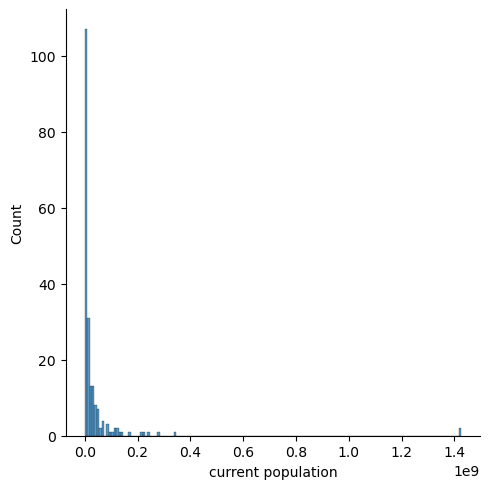

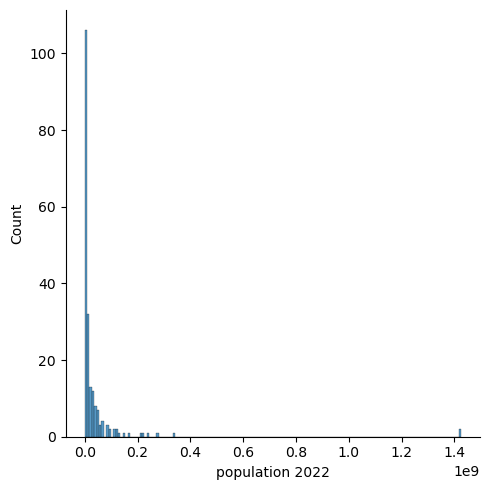

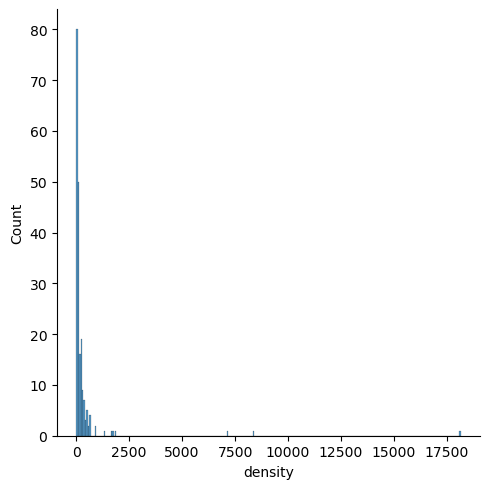

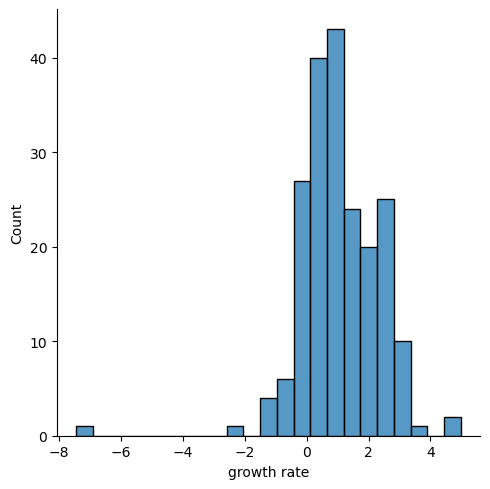

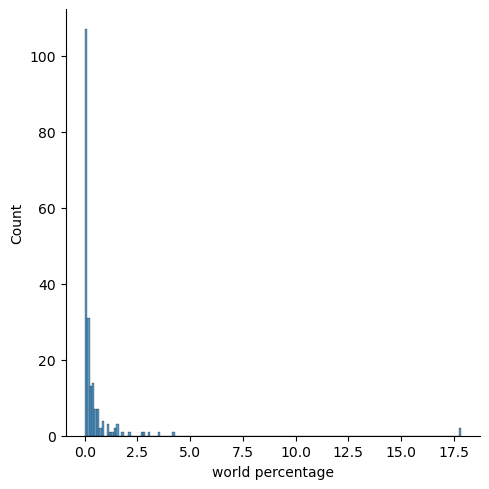

In [14]:
sns.displot(data['current population'])
sns.displot(data['population 2022'])
sns.displot(data['density'])
sns.displot(data['growth rate'])
sns.displot(data['world percentage'])

In [35]:
most_pop = data.groupby(['country name']).sum()['current population'].reset_index()
most_pop.sort_values(by=['current population'], ascending=False, inplace=True)
most_pop = most_pop.head(10)
most_pop.sort_values(by=['current population'], ascending=True, inplace=True)
most_pop

,country name,current population
114,Mexico,128061868
150,Russia,144652401
13,Bangladesh,172220907
23,Brazil,215904975
130,Nigeria,221592544
135,Pakistan,238517163
79,Indonesia,276576867
194,United States,339231549
78,India,1423118510
35,China,1425820141


In [41]:
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=most_pop['country name'], y=most_pop['current population'])])
fig.update_layout(title="Top 10 countries with the biggest population size", xaxis_title="Countries",
    yaxis_title="Population")
fig.show()

In [76]:
above_100mil = data[data["current population"] >100000000].sort_values("growth rate",ignore_index = True)
above_100mil

,country name,current population,population 2022,area,land area,density,growth rate,world percentage,rank
0,Japan,123569707,123951692,377.9K,364.5K,338.0,-0.53,1.54,12
1,Russia,144652401,144713314,17.1M,16.4M,9.0,-0.19,1.80,9
2,China,1425820141,1425887337,9.7M,9.4M,151.0,-0.02,17.81,2
3,United States,339231549,338289857,9.4M,9.1M,37.0,0.50,4.25,3
4,Brazil,215904975,215313498,8.5M,8.4M,26.0,0.52,2.70,7
5,Indonesia,276576867,275501339,1.9M,1.9M,148.0,0.74,3.47,4
6,Mexico,128061868,127504125,2M,1.9M,66.0,0.75,1.60,10
7,India,1423118510,1417173173,3.3M,3M,481.0,0.81,17.85,1
8,Bangladesh,172220907,171186372,147.6K,130.2K,1329.0,1.03,2.16,8
9,Philippines,116598689,115559009,342.4K,298.2K,394.0,1.54,1.47,13


In [38]:
least_pop = data.groupby(['country name']).sum()['current population'].reset_index()
least_pop.sort_values(by=['current population'], ascending=True, inplace=True)
least_pop = least_pop.head(10)
least_pop

,country name,current population
189,Tuvalu,11396
124,Nauru,12780
136,Palau,18058
156,San Marino,33642
117,Monaco,36297
100,Liechtenstein,39584
109,Marshall Islands,41996
152,Saint Kitts And Nevis,47755
66,Greenland,56643
45,Dominica,73040


In [42]:
fig = go.Figure([go.Bar(x=least_pop['country name'], y=least_pop['current population'])])
fig.update_layout(title="Top 10 countries with the smallest population size", xaxis_title="Countries",
    yaxis_title="Population")
fig.show()

In [77]:
below_100k = data[data["current population"] <100000].sort_values("growth rate",ignore_index = True)
below_100k

,country name,current population,population 2022,area,land area,density,growth rate,world percentage,rank
0,Monaco,36297,36469,2,2,18149.00,-0.47,0.0,217
1,San Marino,33642,33660,61,60,561.00,-0.05,0.0,218
2,Palau,18058,18055,459,460,39.00,0.02,0.0,222
3,Saint Kitts And Nevis,47755,47657,261,260,184.00,0.21,0.0,211
4,Greenland,56643,56466,2.2M,410.4K,0.14,0.31,0.0,208
5,Andorra,80088,79824,468,470,170.00,0.33,0.0,203
6,Dominica,73040,72737,751,750,97.00,0.42,0.0,204
7,Antigua And Barbuda,94298,93763,442,440,214.00,0.57,0.0,201
8,Liechtenstein,39584,39327,160,160,247.00,0.65,0.0,216
9,Tuvalu,11396,11312,26,30,380.00,0.74,0.0,227


In [51]:
most_growth = data.groupby(['country name']).sum()['growth rate'].reset_index()
most_growth.sort_values(by=['growth rate'], ascending=False, inplace=True)
most_growth = most_growth.head(10)
most_growth.sort_values(by=['growth rate'], ascending=True, inplace=True)
most_growth

,country name,growth rate
180,Tanzania,2.96
113,Mayotte,3.03
4,Angola,3.08
107,Mali,3.10
167,Somalia,3.10
33,Chad,3.13
47,Dr Congo,3.29
129,Niger,3.80
177,Syria,4.98
116,Moldova,4.98


In [67]:
fig = go.Figure([go.Bar(x=most_growth['country name'], y=most_growth['growth rate'])])
fig.update_layout(title="Top 10 countries with the fastest population growth", xaxis_title="Countries",
    yaxis_title="Growth Rate")
fig.show()

In [64]:
most_decline = data.groupby(['country name']).sum()['growth rate'].reset_index()
most_decline.sort_values(by=['growth rate'], ascending=True, inplace=True)
most_decline = most_decline.head(10)
most_decline

,country name,growth rate
191,Ukraine,-7.45
96,Lebanon,-2.47
25,Bulgaria,-1.39
101,Lithuania,-1.15
95,Latvia,-1.10
160,Serbia,-1.00
21,Bosnia And Herzegovina,-0.70
39,Croatia,-0.54
106,Maldives,-0.53
87,Japan,-0.53


In [66]:
fig = go.Figure([go.Bar(x=most_decline['country name'], y=most_decline['growth rate'])])
fig.update_layout(title="Top 10 countries with the fastest population decline", xaxis_title="Countries",
    yaxis_title="Growth Rate")
fig.show()

In [71]:
declining = data[data["growth rate"] <0].sort_values("growth rate",ignore_index = True)
declining

,country name,current population,population 2022,area,land area,density,growth rate,world percentage,rank
0,Ukraine,36181079,39701739,603.5K,579.4K,63.0,-7.45,0.46,41
1,Lebanon,5413182,5489739,10.5K,10.2K,523.0,-2.47,0.07,122
2,Bulgaria,6723268,6781953,110.9K,108.6K,62.0,-1.39,0.08,110
3,Lithuania,2728886,2750055,65.3K,62.6K,43.0,-1.15,0.03,142
4,Latvia,1838111,1850651,64.6K,62.2K,29.0,-1.10,0.02,151
5,Serbia,7175411,7221365,88.4K,87.5K,82.0,-1.00,0.09,105
6,Bosnia And Herzegovina,3218747,3233526,51.2K,51.2K,63.0,-0.70,0.04,137
7,Croatia,4017834,4030358,56.6K,56K,72.0,-0.54,0.05,130
8,Maldives,522338,523787,300,300,1737.0,-0.53,0.01,174
9,Japan,123569707,123951692,377.9K,364.5K,338.0,-0.53,1.54,12


In [78]:
notgrowing = data[data["growth rate"] ==0].sort_values("growth rate",ignore_index = True)
notgrowing

,country name,current population,population 2022,area,land area,density,growth rate,world percentage,rank


In [83]:
compare = data[['current population', 'country name','growth rate']].sort_values(by="current population",ascending=False)
compare = compare.head(10)
compare.head(10)

fig = go.Figure([go.Bar(x=compare['country name'], y=compare['growth rate'])])
fig.update_layout(title="Top 10 most populated countries related to growth rate", xaxis_title="Countries",
    yaxis_title="Growth Rate")
fig.show()

In [84]:
compare = data[['current population', 'country name','growth rate']].sort_values(by="current population",ascending=True)
compare = compare.head(10)
compare.head(10)

fig = go.Figure([go.Bar(x=compare['country name'], y=compare['growth rate'])])
fig.update_layout(title="Top 10 least populated countries related to growth rate", xaxis_title="Countries",
    yaxis_title="Growth Rate")
fig.show()

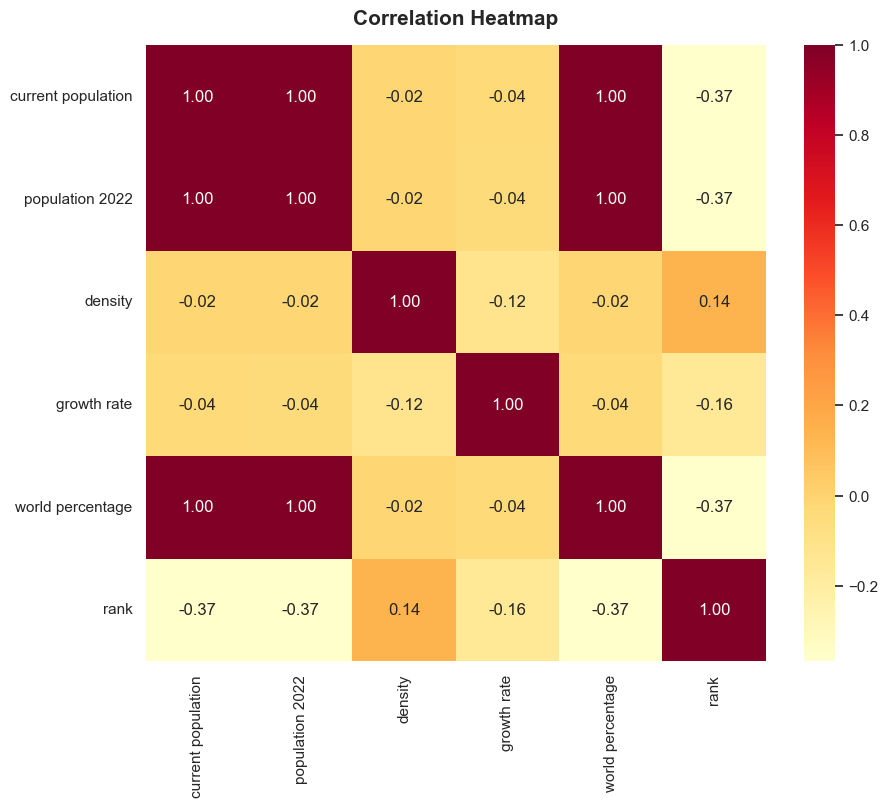

In [86]:
plt.figure(figsize=(10,8))
heatmap = sns.heatmap(data.corr(), annot = True, cmap= 'YlOrRd', fmt= '.2f')
heatmap.set_title("Correlation Heatmap", pad = 15, fontsize=15, fontweight="bold")
plt.show()